In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [4]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df1.iloc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df1.groupby(['Embarked', 'Sex']).sum()

PassengerId  Survived  Pclass       Age  SibSp  Parch  \
Embarked Sex                                                             
C        female        31924        64     126   1729.00     40     36   
         male          42896        29     191   2276.92     25     25   
Q        female        13469        27     104    291.50      8      8   
         male          18709         3     120    495.00     25      5   
S        female        89058       140     446   5165.50    170    160   
         male         200438        77    1068  11147.25    198    106   

                      Fare  
Embarked Sex                
C        female  5487.3958  
         male    4584.9004  
Q        female   454.8585  
         male     567.3958  
S        female  7864.4085  
         male    9574.9903

In [8]:
df1.iloc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
df3 = df1.drop('Survived', axis = 1)

In [10]:
survived = df1['Survived']

In [11]:
df = pd.concat([df3, df2], axis = 0)

In [12]:
df = df.reset_index()

In [13]:
df

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
df= df.drop('index', axis =1 )

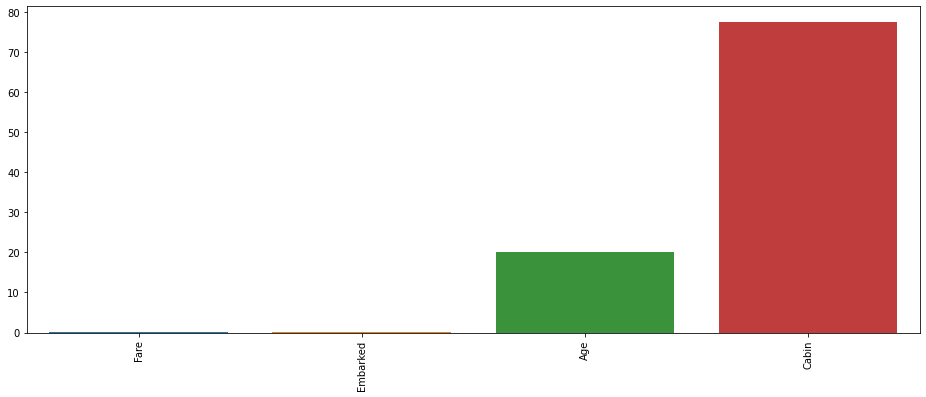

In [15]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [17]:
df['Cabin'] = df['Cabin'].fillna('None')
df['Cabin Class']= df['Cabin'].apply(lambda x:x[0])

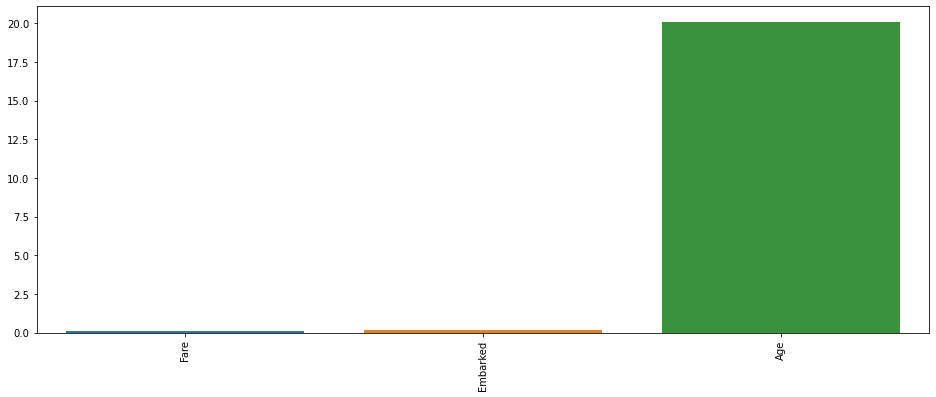

In [18]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [19]:
df['Second Name'] = df['Name'].apply(lambda x : (x.split('.')[0]).split(',')[1].strip())

In [20]:
df['Fare'] = df["Fare"].fillna(13.6755)

In [21]:
df[df['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,Miss
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,Mrs


In [22]:
df = df.drop([61,829],axis = 0)

In [23]:
survived = survived.drop([61, 829], axis = 0)

In [24]:
survived.iloc[[61, 829]]

62     0
831    1
Name: Survived, dtype: int64

In [25]:
names = set(df['Second Name'])
age_nonnull = df[df['Age'].notnull()]
for name in names:
    nulls = df[(df['Second Name'] == name)].fillna(df[df['Second Name'] == name]['Age'].mean())
    age_nonnull = pd.concat([age_nonnull, nulls], axis =0)

In [26]:
df = age_nonnull.drop_duplicates()
df = df.sort_index()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Pclass       1307 non-null   int64  
 2   Name         1307 non-null   object 
 3   Sex          1307 non-null   object 
 4   Age          1307 non-null   float64
 5   SibSp        1307 non-null   int64  
 6   Parch        1307 non-null   int64  
 7   Ticket       1307 non-null   object 
 8   Fare         1307 non-null   float64
 9   Cabin        1307 non-null   object 
 10  Embarked     1307 non-null   object 
 11  Cabin Class  1307 non-null   object 
 12  Second Name  1307 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 143.0+ KB


In [28]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S,N,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S,N,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,None,S,N,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,None,S,N,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,C,Dona
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,None,S,N,Mr
1307,1308,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,None,S,N,Mr


In [29]:
df['Family Members'] = df['SibSp']+df['Parch']

In [30]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name,Family Members
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S,N,Mr,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,Mrs,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S,N,Miss,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C,Mrs,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,None,S,N,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,None,S,N,Mr,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,C,Dona,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,None,S,N,Mr,0
1307,1308,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,None,S,N,Mr,0


In [31]:
df5 = df.set_index('PassengerId').sort_index()

In [32]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [33]:
# test.to_csv("Test_final.csv", index = False)

In [34]:
# train.to_csv("Train_final.csv", index = False)

In [35]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin Class,Second Name,Family Members
0,1,3,male,22.000000,1,0,7.2500,S,N,Mr,1
1,2,1,female,38.000000,1,0,71.2833,C,C,Mrs,1
2,3,3,female,26.000000,0,0,7.9250,S,N,Miss,0
3,4,1,female,35.000000,1,0,53.1000,S,C,Mrs,1
4,5,3,male,35.000000,0,0,8.0500,S,N,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,32.252151,0,0,8.0500,S,N,Mr,0
1305,1306,1,female,39.000000,0,0,108.9000,C,C,Dona,0
1306,1307,3,male,38.500000,0,0,7.2500,S,N,Mr,0
1307,1308,3,male,32.252151,0,0,8.0500,S,N,Mr,0


In [36]:
X_str = df[['Sex', 'Embarked', 'Cabin Class', 'Second Name']]
X_int = df.drop(['Sex', 'Embarked', 'Cabin Class', 'Second Name'], axis = 1)

X_str_dummies = pd.get_dummies(data = X_str, drop_first=True)

df_combined = pd.concat([X_str_dummies,X_int], axis = 1)

In [37]:
df_combined

,Sex_male,Embarked_Q,Embarked_S,Cabin Class_B,Cabin Class_C,Cabin Class_D,Cabin Class_E,Cabin Class_F,Cabin Class_G,Cabin Class_N,...,Second Name_Rev,Second Name_Sir,Second Name_the Countess,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family Members
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,3,22.000000,1,0,7.2500,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,1,38.000000,1,0,71.2833,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,3,3,26.000000,0,0,7.9250,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,4,1,35.000000,1,0,53.1000,1
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,5,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1305,3,32.252151,0,0,8.0500,0
1305,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1306,1,39.000000,0,0,108.9000,0
1306,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1307,3,38.500000,0,0,7.2500,0
1307,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1308,3,32.252151,0,0,8.0500,0


In [38]:
df_combined.iloc[:889]

,Sex_male,Embarked_Q,Embarked_S,Cabin Class_B,Cabin Class_C,Cabin Class_D,Cabin Class_E,Cabin Class_F,Cabin Class_G,Cabin Class_N,...,Second Name_Rev,Second Name_Sir,Second Name_the Countess,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family Members
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,3,22.000000,1,0,7.2500,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,1,38.000000,1,0,71.2833,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,3,3,26.000000,0,0,7.9250,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,4,1,35.000000,1,0,53.1000,1
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,5,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,0,0,0,0,1,...,1,0,0,887,2,27.000000,0,0,13.0000,0
887,0,0,1,1,0,0,0,0,0,0,...,0,0,0,888,1,19.000000,0,0,30.0000,0
888,0,0,1,0,0,0,0,0,0,1,...,0,0,0,889,3,21.696603,1,2,23.4500,3
889,1,0,0,0,1,0,0,0,0,0,...,0,0,0,890,1,26.000000,0,0,30.0000,0


In [39]:
train = df_combined.iloc[:889]

In [40]:
test = df_combined.iloc[889:]

In [41]:
train

,Sex_male,Embarked_Q,Embarked_S,Cabin Class_B,Cabin Class_C,Cabin Class_D,Cabin Class_E,Cabin Class_F,Cabin Class_G,Cabin Class_N,...,Second Name_Rev,Second Name_Sir,Second Name_the Countess,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family Members
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,3,22.000000,1,0,7.2500,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,1,38.000000,1,0,71.2833,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,3,3,26.000000,0,0,7.9250,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,4,1,35.000000,1,0,53.1000,1
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,5,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,0,0,0,0,1,...,1,0,0,887,2,27.000000,0,0,13.0000,0
887,0,0,1,1,0,0,0,0,0,0,...,0,0,0,888,1,19.000000,0,0,30.0000,0
888,0,0,1,0,0,0,0,0,0,1,...,0,0,0,889,3,21.696603,1,2,23.4500,3
889,1,0,0,0,1,0,0,0,0,0,...,0,0,0,890,1,26.000000,0,0,30.0000,0


In [42]:
# train.to_csv('train_final.csv', index = False)

In [43]:
test

,Sex_male,Embarked_Q,Embarked_S,Cabin Class_B,Cabin Class_C,Cabin Class_D,Cabin Class_E,Cabin Class_F,Cabin Class_G,Cabin Class_N,...,Second Name_Rev,Second Name_Sir,Second Name_the Countess,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family Members
891,1,1,0,0,0,0,0,0,0,1,...,0,0,0,892,3,34.500000,0,0,7.8292,0
892,0,0,1,0,0,0,0,0,0,1,...,0,0,0,893,3,47.000000,1,0,7.0000,1
893,1,1,0,0,0,0,0,0,0,1,...,0,0,0,894,2,62.000000,0,0,9.6875,0
894,1,0,1,0,0,0,0,0,0,1,...,0,0,0,895,3,27.000000,0,0,8.6625,0
895,0,0,1,0,0,0,0,0,0,1,...,0,0,0,896,3,22.000000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1305,3,32.252151,0,0,8.0500,0
1305,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1306,1,39.000000,0,0,108.9000,0
1306,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1307,3,38.500000,0,0,7.2500,0
1307,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1308,3,32.252151,0,0,8.0500,0


In [44]:
test.to_csv('test_final.csv', index = False)

In [45]:
train = train.drop('PassengerId', axis = 1)

In [46]:
test = test.drop('PassengerId', axis = 1)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sex_male                  889 non-null    uint8  
 1   Embarked_Q                889 non-null    uint8  
 2   Embarked_S                889 non-null    uint8  
 3   Cabin Class_B             889 non-null    uint8  
 4   Cabin Class_C             889 non-null    uint8  
 5   Cabin Class_D             889 non-null    uint8  
 6   Cabin Class_E             889 non-null    uint8  
 7   Cabin Class_F             889 non-null    uint8  
 8   Cabin Class_G             889 non-null    uint8  
 9   Cabin Class_N             889 non-null    uint8  
 10  Cabin Class_T             889 non-null    uint8  
 11  Second Name_Col           889 non-null    uint8  
 12  Second Name_Don           889 non-null    uint8  
 13  Second Name_Dona          889 non-null    uint8  
 14  Second Nam

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sex_male                  418 non-null    uint8  
 1   Embarked_Q                418 non-null    uint8  
 2   Embarked_S                418 non-null    uint8  
 3   Cabin Class_B             418 non-null    uint8  
 4   Cabin Class_C             418 non-null    uint8  
 5   Cabin Class_D             418 non-null    uint8  
 6   Cabin Class_E             418 non-null    uint8  
 7   Cabin Class_F             418 non-null    uint8  
 8   Cabin Class_G             418 non-null    uint8  
 9   Cabin Class_N             418 non-null    uint8  
 10  Cabin Class_T             418 non-null    uint8  
 11  Second Name_Col           418 non-null    uint8  
 12  Second Name_Don           418 non-null    uint8  
 13  Second Name_Dona          418 non-null    uint8  
 14  Second 

In [49]:
survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [50]:
train

,Sex_male,Embarked_Q,Embarked_S,Cabin Class_B,Cabin Class_C,Cabin Class_D,Cabin Class_E,Cabin Class_F,Cabin Class_G,Cabin Class_N,...,Second Name_Ms,Second Name_Rev,Second Name_Sir,Second Name_the Countess,Pclass,Age,SibSp,Parch,Fare,Family Members
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,3,22.000000,1,0,7.2500,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,38.000000,1,0,71.2833,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,3,26.000000,0,0,7.9250,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,35.000000,1,0,53.1000,1
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,2,27.000000,0,0,13.0000,0
887,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,19.000000,0,0,30.0000,0
888,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,3,21.696603,1,2,23.4500,3
889,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,26.000000,0,0,30.0000,0


In [52]:
X = train
y = survived

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test2 = scaler.transform(test)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [52]:
X_train.shape

(533, 34)

In [53]:
test.shape

(418, 34)

In [54]:
X_test.shape

(356, 34)

In [55]:
# penalty = ['elasticnet']
# l1_ratio = [.1,.2,.5,.9,.99,1]
# # Use logarithmically spaced C values (recommended in official docs)
# C = np.logspace(0,1, 5)
# # C = 7.659678234751838

In [56]:
param_grid = {'C':[7.5,8,8.5], 
              'penalty':['elasticnet'], 
              'l1_ratio':[.01,.05,.06]}

In [57]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [58]:
grid_model = GridSearchCV(log_model,param_grid=param_grid, scoring = 'accuracy', verbose=2)

In [59]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=7.5, l1_ratio=0.01, penalty=elasticnet ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=7.5, l1_ratio=0.01, penalty=elasticnet, total=   0.4s
[CV] C=7.5, l1_ratio=0.01, penalty=elasticnet ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ......... C=7.5, l1_ratio=0.01, penalty=elasticnet, total=   0.5s
[CV] C=7.5, l1_ratio=0.01, penalty=elasticnet ........................
[CV] ......... C=7.5, l1_ratio=0.01, penalty=elasticnet, total=   0.4s
[CV] C=7.5, l1_ratio=0.01, penalty=elasticnet ........................
[CV] ......... C=7.5, l1_ratio=0.01, penalty=elasticnet, total=   0.2s
[CV] C=7.5, l1_ratio=0.01, penalty=elasticnet ........................
[CV] ......... C=7.5, l1_ratio=0.01, penalty=elasticnet, total=   0.5s
[CV] C=7.5, l1_ratio=0.05, penalty=elasticnet ........................
[CV] ......... C=7.5, l1_ratio=0.05, penalty=elasticnet, total=   0.4s
[CV] C=7.5, l1_ratio=0.05, penalty=elasticnet ........................
[CV] ......... C=7.5, l1_ratio=0.05, penalty=elasticnet, total=   0.5s
[CV] C=7.5, l1_ratio=0.05, penalty=elasticnet ........................
[CV] ......... C=7.5, l1_ratio=0.05, penalty=elasticnet, total=   0.4s
[CV] C=7.5, l1_ratio=0.05, penalty=elasticnet ........................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   18.6s finished


GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': [7.5, 8, 8.5], 'l1_ratio': [0.01, 0.05, 0.06],
                         'penalty': ['elasticnet']},
             scoring='accuracy', verbose=2)

In [60]:
grid_model.best_params_

{'C': 7.5, 'l1_ratio': 0.05, 'penalty': 'elasticnet'}

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [62]:
y_pred = grid_model.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.8426966292134831

In [64]:
len(y_test)

356

In [65]:
y_test.sum()

140

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       216
           1       0.83      0.75      0.79       140

    accuracy                           0.84       356
   macro avg       0.84      0.83      0.83       356
weighted avg       0.84      0.84      0.84       356



In [67]:
len(X_test2)

418

In [68]:
y_pred2 = grid_model.predict(X_test2)

In [69]:
y_pred2.sum()

166

In [70]:
len(y_pred2)

418

In [71]:
output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': y_pred2})
output.to_csv('submission4.csv', index=False)

## KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
KNeighborsRegressor?

In [87]:
knn = KNeighborsClassifier()

In [104]:
param2 = {
    'n_neighbors' : [14, 15,16,20],
    'weights' : ['uniform', 'distance']
}

In [105]:
grid2 = GridSearchCV(knn, param2, verbose=2)

In [106]:
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=14, weights=uniform .................................
[CV] .................. n_neighbors=14, weights=uniform, total=   0.0s
[CV] n_neighbors=14, weights=uniform .................................
[CV] .................. n_neighbors=14, weights=uniform, total=   0.0s
[CV] n_neighbors=14, weights=uniform .................................
[CV] .................. n_neighbors=14, weights=uniform, total=   0.0s
[CV] n_neighbors=14, weights=uniform .................................
[CV] .................. n_neighbors=14, weights=uniform, total=   0.0s
[CV] n_neighbors=14, weights=uniform .................................
[CV] .................. n_neighbors=14, weights=uniform, total=   0.0s
[CV] n_neighbors=14, weights=distance ................................
[CV] ................. n_neighbors=14, weights=distance, total=   0.0s
[CV] n_neighbors=14, weights=distance ................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=15, weights=distance ................................
[CV] ................. n_neighbors=15, weights=distance, total=   0.0s
[CV] n_neighbors=16, weights=uniform .................................
[CV] .................. n_neighbors=16, weights=uniform, total=   0.0s
[CV] n_neighbors=16, weights=uniform .................................
[CV] .................. n_neighbors=16, weights=uniform, total=   0.0s
[CV] n_neighbors=16, weights=uniform .................................
[CV] .................. n_neighbors=16, weights=uniform, total=   0.0s
[CV] n_neighbors=16, weights=uniform .................................
[CV] .................. n_neighbors=16, weights=uniform, total=   0.0s
[CV] n_neighbors=16, weights=uniform .................................
[CV] .................. n_neighbors=16, weights=uniform, total=   0.0s
[CV] n_neighbors=16, weights=distance ................................
[CV] ................. n_neighbors=16, weights=distance, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [14, 15, 16, 20],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [107]:
grid2.best_params_

{'n_neighbors': 16, 'weights': 'uniform'}

In [108]:
y_pred2 = grid2.predict(X_test)

In [109]:
# y_pred2

In [110]:
accuracy_score(y_test,y_pred2)

0.8117977528089888

In [123]:
y_pred_final = grid_model.predict(X_test2)

In [124]:
len(y_pred_final)

418

In [125]:
y_pred_final.sum()

166

## SVM

In [74]:
from sklearn.svm import SVC

In [75]:
svc = SVC()

In [95]:
param = {
    'C':[.5,.6,.75,0.8, 0.9],
    'kernel':['rbf'],
    'gamma': ['scale', 'auto'],
#     'degree': [2,3,4,5] 
}

In [96]:
grid_model_2 = GridSearchCV(estimator=svc, param_grid=param, verbose=2, scoring='balanced_accuracy')

In [97]:
grid_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=rbf ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] .................... C=0.6, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=0.75, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.75, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.75, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.75, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.75, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.75, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.75, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.75, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.75, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.75, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.75, gamma=auto, kernel=rbf ..................................
[CV] ................... C=0.75, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=0.75, gamma=auto, kernel=rbf ..................................
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 0.6, 0.75, 0.8, 0.9],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             scoring='balanced_accuracy', verbose=2)

In [98]:
grid_model_2.best_params_

{'C': 0.75, 'gamma': 'scale', 'kernel': 'rbf'}

In [99]:
pred3 = grid_model_2.predict(X_test)

In [100]:
accuracy_score(y_test,pred3)

0.8398876404494382

In [101]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       216
           1       0.80      0.79      0.79       140

    accuracy                           0.84       356
   macro avg       0.83      0.83      0.83       356
weighted avg       0.84      0.84      0.84       356



In [102]:
y_pred_final = grid_model_2.predict(X_test2)

In [103]:
y_pred_final.sum()

178

In [104]:
output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': y_pred_final})
output.to_csv('submission5.csv', index=False)

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rfc = RandomForestClassifier()

In [152]:
n_estimators=[115,120, 125]
max_features= [28, 30, 31,32]
bootstrap = [True,False]

In [153]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}  

In [154]:

grid = GridSearchCV(rfc,param_grid, verbose=2, scoring='balanced_accuracy')

In [155]:
X_train.shape

(533, 34)

In [156]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] bootstrap=True, max_features=28, n_estimators=115 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=28, n_estimators=115, total=   0.2s
[CV] bootstrap=True, max_features=28, n_estimators=115 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_features=28, n_estimators=115, total=   0.2s
[CV] bootstrap=True, max_features=28, n_estimators=115 ...............
[CV]  bootstrap=True, max_features=28, n_estimators=115, total=   0.2s
[CV] bootstrap=True, max_features=28, n_estimators=115 ...............
[CV]  bootstrap=True, max_features=28, n_estimators=115, total=   0.2s
[CV] bootstrap=True, max_features=28, n_estimators=115 ...............
[CV]  bootstrap=True, max_features=28, n_estimators=115, total=   0.2s
[CV] bootstrap=True, max_features=28, n_estimators=120 ...............
[CV]  bootstrap=True, max_features=28, n_estimators=120, total=   0.2s
[CV] bootstrap=True, max_features=28, n_estimators=120 ...............
[CV]  bootstrap=True, max_features=28, n_estimators=120, total=   0.3s
[CV] bootstrap=True, max_features=28, n_estimators=120 ...............
[CV]  bootstrap=True, max_features=28, n_estimators=120, total=   0.3s
[CV] bootstrap=True, max_features=28, n_estimators=120 ...............
[CV]  

[CV]  bootstrap=True, max_features=32, n_estimators=125, total=   0.2s
[CV] bootstrap=False, max_features=28, n_estimators=115 ..............
[CV]  bootstrap=False, max_features=28, n_estimators=115, total=   0.3s
[CV] bootstrap=False, max_features=28, n_estimators=115 ..............
[CV]  bootstrap=False, max_features=28, n_estimators=115, total=   0.2s
[CV] bootstrap=False, max_features=28, n_estimators=115 ..............
[CV]  bootstrap=False, max_features=28, n_estimators=115, total=   0.3s
[CV] bootstrap=False, max_features=28, n_estimators=115 ..............
[CV]  bootstrap=False, max_features=28, n_estimators=115, total=   0.2s
[CV] bootstrap=False, max_features=28, n_estimators=115 ..............
[CV]  bootstrap=False, max_features=28, n_estimators=115, total=   0.2s
[CV] bootstrap=False, max_features=28, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=28, n_estimators=120, total=   0.3s
[CV] bootstrap=False, max_features=28, n_estimators=120 ..............


[CV]  bootstrap=False, max_features=32, n_estimators=125, total=   0.3s
[CV] bootstrap=False, max_features=32, n_estimators=125 ..............
[CV]  bootstrap=False, max_features=32, n_estimators=125, total=   0.3s
[CV] bootstrap=False, max_features=32, n_estimators=125 ..............
[CV]  bootstrap=False, max_features=32, n_estimators=125, total=   0.2s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   29.0s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [28, 30, 31, 32],
                         'n_estimators': [115, 120, 125]},
             scoring='balanced_accuracy', verbose=2)

In [157]:
grid.best_params_

{'bootstrap': True, 'max_features': 30, 'n_estimators': 120}

In [158]:
pred5 = grid.predict(X_test)

In [159]:
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       216
           1       0.80      0.75      0.77       140

    accuracy                           0.83       356
   macro avg       0.82      0.81      0.82       356
weighted avg       0.82      0.83      0.82       356



In [160]:
y_pred_final = grid.predict(X_test2)

In [161]:
y_pred_final.sum()

157

In [162]:
output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': y_pred_final})
output.to_csv('submission6.csv', index=False)

In [140]:
pd.read_csv('submission5.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [163]:
pd.read_csv('submission6.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## AdaBoost

In [164]:
from sklearn.ensemble import AdaBoostClassifier

In [166]:
model = AdaBoostClassifier()

In [183]:
param = {
    'n_estimators':[145, 150, 155]
}

In [191]:
grida = GridSearchCV(model, param, verbose=2, scoring='balanced_accuracy')

In [192]:
grida.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=145 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=145, total=   0.3s
[CV] n_estimators=145 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................. n_estimators=145, total=   0.3s
[CV] n_estimators=145 ................................................
[CV] ................................. n_estimators=145, total=   0.3s
[CV] n_estimators=145 ................................................
[CV] ................................. n_estimators=145, total=   0.3s
[CV] n_estimators=145 ................................................
[CV] ................................. n_estimators=145, total=   0.3s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   0.3s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   0.3s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   0.3s
[CV] n_estimators=150 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.5s finished


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [145, 150, 155]},
             scoring='balanced_accuracy', verbose=2)

In [193]:
grid.best_params_

{'n_estimators': 155}

In [187]:
pred5 = grid.predict(X_test)

In [188]:
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       216
           1       0.73      0.73      0.73       140

    accuracy                           0.79       356
   macro avg       0.78      0.78      0.78       356
weighted avg       0.79      0.79      0.79       356



In [189]:
y_pred_final = grid.predict(X_test2)

In [190]:
y_pred_final.sum()

166

In [195]:
grid.best_estimator_.feature_importances_

array([0.01935484, 0.        , 0.00645161, 0.        , 0.00645161,
       0.        , 0.        , 0.        , 0.00645161, 0.01290323,
       0.        , 0.        , 0.00645161, 0.        , 0.00645161,
       0.        , 0.        , 0.        , 0.01935484, 0.        ,
       0.        , 0.        , 0.01290323, 0.01290323, 0.        ,
       0.00645161, 0.        , 0.        , 0.01935484, 0.2516129 ,
       0.03870968, 0.02580645, 0.50322581, 0.04516129])

In [197]:
test.columns

Index(['Sex_male', 'Embarked_Q', 'Embarked_S', 'Cabin Class_B',
       'Cabin Class_C', 'Cabin Class_D', 'Cabin Class_E', 'Cabin Class_F',
       'Cabin Class_G', 'Cabin Class_N', 'Cabin Class_T', 'Second Name_Col',
       'Second Name_Don', 'Second Name_Dona', 'Second Name_Dr',
       'Second Name_Jonkheer', 'Second Name_Lady', 'Second Name_Major',
       'Second Name_Master', 'Second Name_Miss', 'Second Name_Mlle',
       'Second Name_Mme', 'Second Name_Mr', 'Second Name_Mrs',
       'Second Name_Ms', 'Second Name_Rev', 'Second Name_Sir',
       'Second Name_the Countess', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Family Members'],
      dtype='object')

In [199]:
feats = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])

In [203]:
imp_feats = feats.sort_values("Importance")

In [204]:
imp_feats

,Importance
Second Name_Lady,0.000000
Second Name_Ms,0.000000
Second Name_Mme,0.000000
Second Name_Mlle,0.000000
Second Name_Miss,0.000000
Second Name_the Countess,0.000000
Second Name_Major,0.000000
Second Name_Jonkheer,0.000000
Second Name_Col,0.000000
Cabin Class_T,0.000000


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
model = DecisionTreeClassifier()

In [59]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
base_pred = model.predict(X_test)

In [61]:
confusion_matrix(y_test,base_pred)

NameError: name 'confusion_matrix' is not defined

In [62]:
print(classification_report(y_test,base_pred))

NameError: name 'classification_report' is not defined

In [211]:
model.feature_importances_

array([0.31775496, 0.00633776, 0.00098451, 0.00725194, 0.        ,
       0.00721971, 0.00909534, 0.        , 0.        , 0.0374384 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00406109,
       0.        , 0.        , 0.00730996, 0.00974661, 0.        ,
       0.        , 0.        , 0.        , 0.07208796, 0.26761451,
       0.03937052, 0.02056754, 0.16419113, 0.02896808])

In [63]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Second Name_Lady,0.000000
Second Name_Sir,0.000000
Second Name_Rev,0.000000
Second Name_Ms,0.000000
Second Name_Mrs,0.000000
Second Name_Mr,0.000000
Second Name_Mme,0.000000
Second Name_Mlle,0.000000
Second Name_Miss,0.000000
Second Name_Master,0.000000


In [56]:
from sklearn.tree import plot_tree


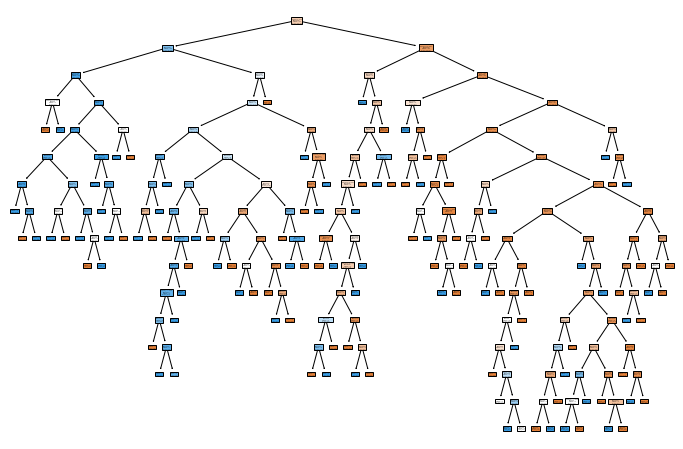

In [66]:
plt.figure(figsize=(12,8))
plot_tree(model,filled=True,feature_names=X.columns);
plt.savefig('titanic.jpeg', dpi = 300)

In [220]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [222]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       216
           1       0.69      0.74      0.72       140

    accuracy                           0.77       356
   macro avg       0.76      0.76      0.76       356
weighted avg       0.77      0.77      0.77       356





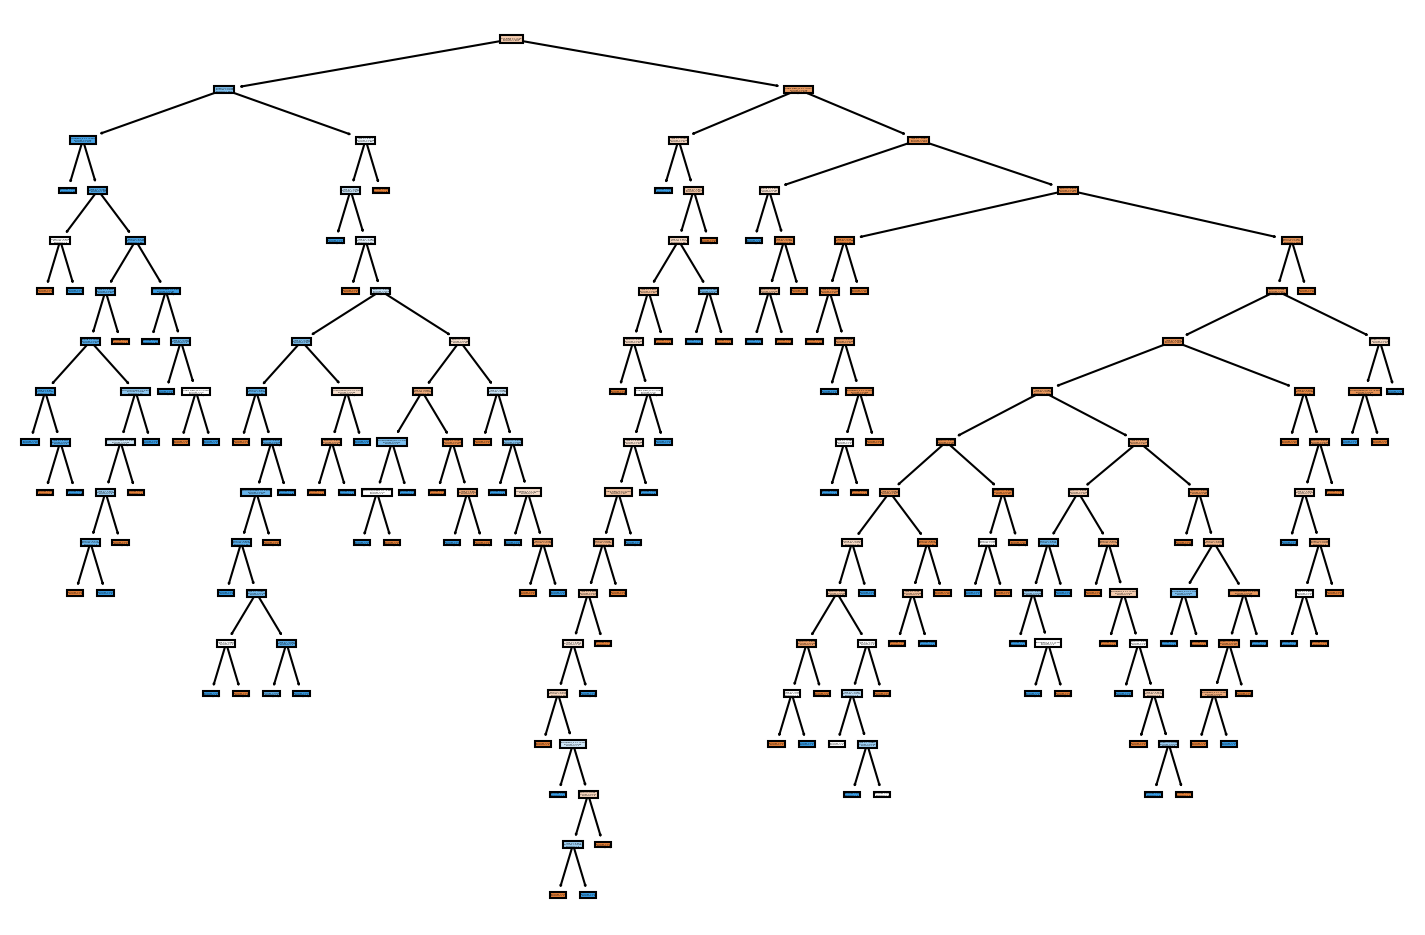

In [223]:
report_model(entropy_tree)

In [226]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       216
           1       0.74      0.65      0.69       140

    accuracy                           0.77       356
   macro avg       0.76      0.75      0.76       356
weighted avg       0.77      0.77      0.77       356





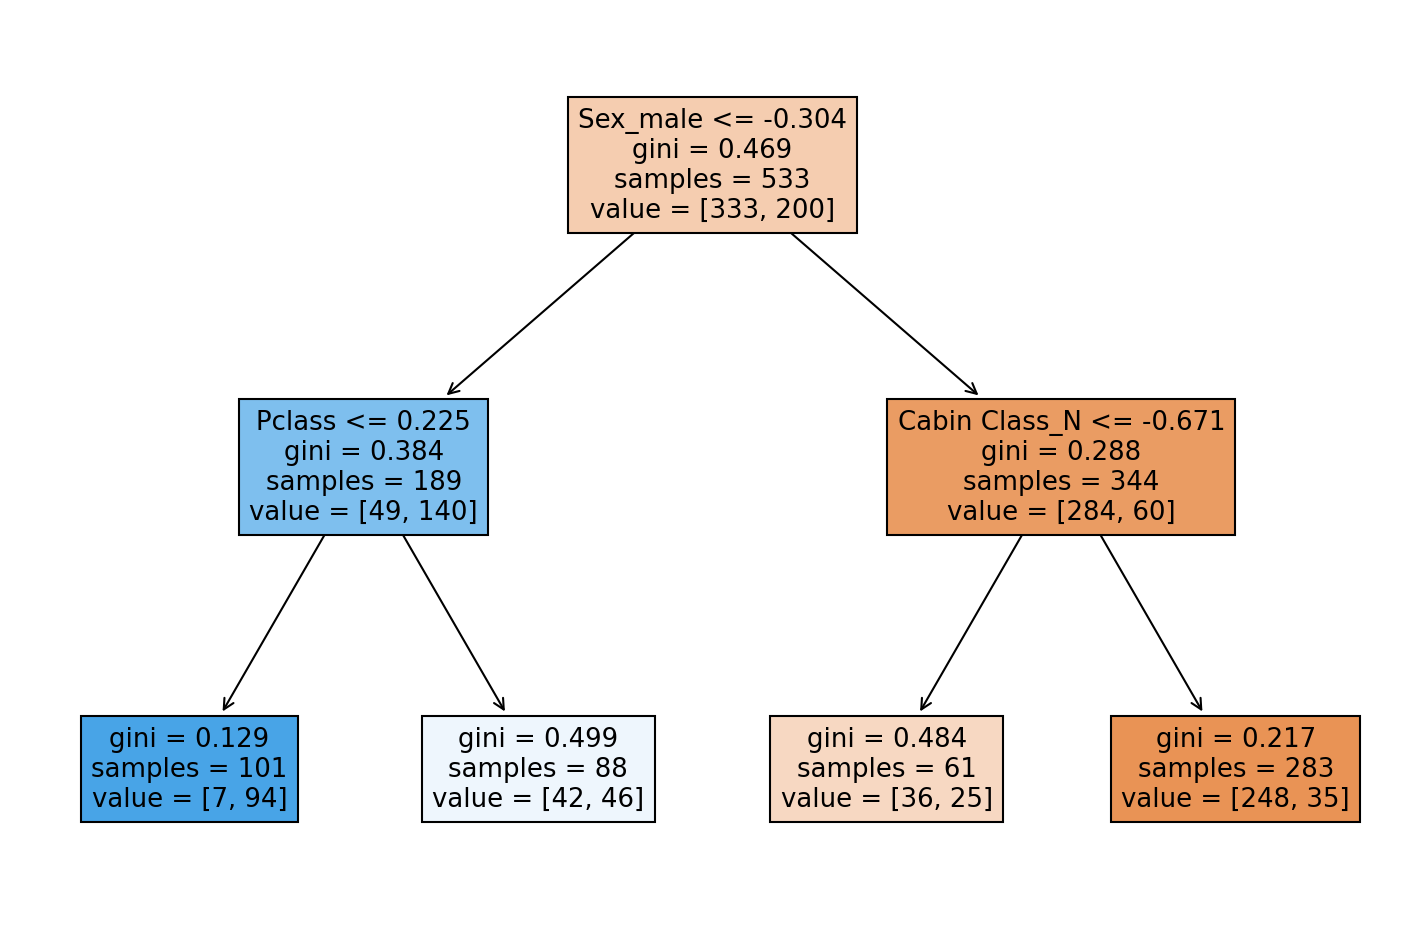

In [227]:
report_model(pruned_tree)